In [1]:
import torch

print("Pytorch version: ", torch.__version__)
print("CUDA available: ", torch.cuda.is_available())


Pytorch version:  2.1.0
CUDA available:  True


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def get_prime_list(min, max):

    # originally tried to get python bindings from https://github.com/shlomif/primesieve-python
    # didn't work with conda or pip, I think it's just old with limited version compatibilities
    # this method with a file is probably just as good

    # from https://github.com/kimwalisch/primesieve
    os.system(f"primesieve {min} {max} -p > generated_primes.txt")

    with open("generated_primes.txt", "r") as f:
        prime_strs = f.read().splitlines()

    return np.array([int(s) for s in prime_strs])

In [4]:
def pi(x):
    os.system(f"primesieve {x} -p > generated_primes.txt")

    with open("generated_primes.txt", "r") as f:
        prime_str = f.read().splitlines()[0]

    return int(prime_str)

def pis(x):

    if x == 0:
        return [0]

    os.system(f"primesieve {x} -p > generated_primes.txt")

    with open("generated_primes.txt", "r") as f:
        prime_strs = f.read().splitlines()

    primes = [int(s) for s in prime_strs]

    pis = np.zeros(x, dtype=int)
    for p in primes:
        pis[p-1:] += 1

    return pis

def pi_approx_x_over_logx(x):
    return x / np.log(x)

def pis_approx_x_over_logx(x):
    return np.arange(1, x+1) / np.log(np.arange(1, x+1))

from mpmath import li
def pi_approx_Lix(x):
    return li(x, offset=True)

def pis_approx_Lix(x):
    return np.array([li(i, offset=True) for i in range(1, x+1)])

In [5]:
def nth_prime(n):

    # 1-indexed, 1st prime is 2, 2nd is 3, etc.

    os.system(f"primesieve -n {n} -p > generated_primes.txt")

    with open("generated_primes.txt", "r") as f:
        prime_str = f.read().splitlines()[0]

    return int(prime_str)

def nth_prime_list(n):

    largest_prime = nth_prime(n)
    
    os.system(f"primesieve {largest_prime} -p > generated_primes.txt")

    with open("generated_primes.txt", "r") as f:
        prime_strs = f.read().splitlines()

    return np.array([int(s) for s in prime_strs])


def nth_prime_approx_nlogn(n):
    return int(n * np.log(n))

def nth_prime_approx_better(n):
    # https://en.wikipedia.org/wiki/Prime_number_theorem#Approximations_for_the_nth_prime_number

    val = n * (
            np.log(n)
          + np.log(np.log(n)) - 1
          + (np.log(np.log(n)) - 2) / np.log(n)
          - (np.log(np.log(n))**2 - 6 * np.log(np.log(n)) + 11) / (2*np.log(n)**2)
        )
    
    if np.isfinite(val) == False:
        return np.nan
    
    return int(val)




/tmp/ipykernel_374429/2428964117.py:31: RuntimeWarning: divide by zero encountered in divide
  return np.arange(1, x+1) / np.log(np.arange(1, x+1))


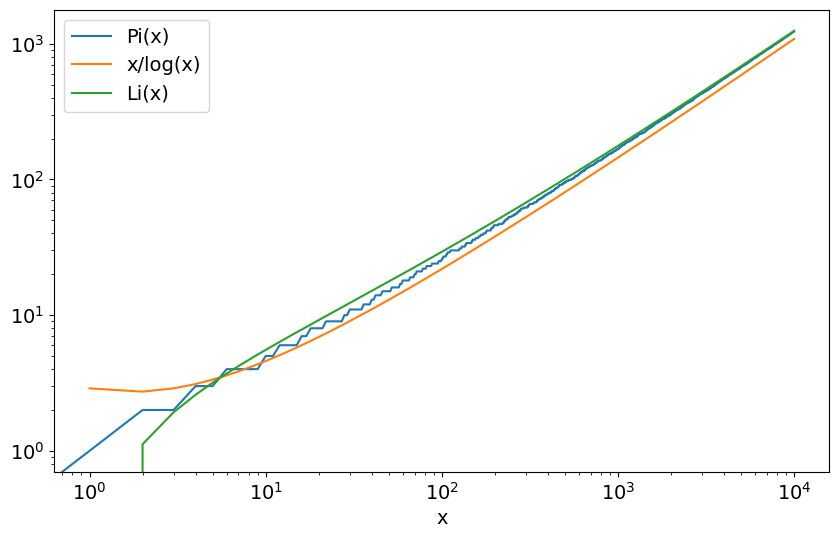

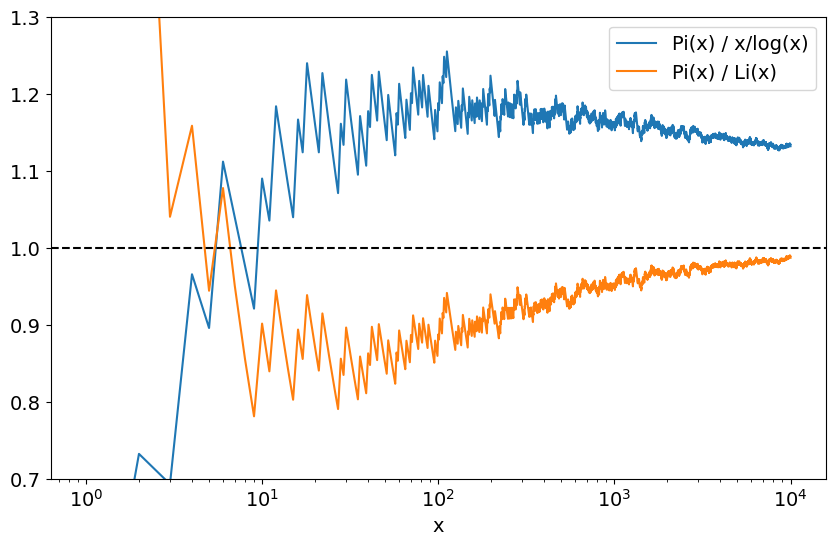

In [6]:
max_num = int(1e4)

plt.rcParams.update({'font.size': 14})

curr_pis = pis(max_num)
curr_pis_approx_x_over_logx = pis_approx_x_over_logx(max_num)
curr_pis_approx_Lix = pis_approx_Lix(max_num)

plt.figure(figsize=(10, 6))
plt.plot(curr_pis, label="Pi(x)")
plt.plot(curr_pis_approx_x_over_logx, label="x/log(x)")
plt.plot(curr_pis_approx_Lix, label="Li(x)")
plt.legend()
plt.xlabel("x")
plt.xscale("log")
plt.yscale("log")
plt.show()

safer_curr_pis_approx_x_over_logx = np.where(curr_pis_approx_x_over_logx == 0, np.nan, curr_pis_approx_x_over_logx)
safer_curr_pis_approx_Lix = np.where(curr_pis_approx_Lix == 0, np.nan, curr_pis_approx_Lix)

curr_pis_approx_x_over_logx_ratio = curr_pis / safer_curr_pis_approx_x_over_logx
curr_pis_approx_Lix_ratio = curr_pis / safer_curr_pis_approx_Lix

plt.figure(figsize=(10, 6))
plt.plot(curr_pis_approx_x_over_logx_ratio, label="Pi(x) / x/log(x)")
plt.plot(curr_pis_approx_Lix_ratio, label="Pi(x) / Li(x)")
plt.axhline(1, color="black", linestyle="--")
plt.legend()
plt.xlabel("x")
#plt.xlim(0, max_num)
plt.xscale("log")
plt.ylim(0.7, 1.3)
plt.show()


/tmp/ipykernel_374429/718067515.py:32: RuntimeWarning: divide by zero encountered in log
  + np.log(np.log(n)) - 1
/tmp/ipykernel_374429/718067515.py:33: RuntimeWarning: divide by zero encountered in log
  + (np.log(np.log(n)) - 2) / np.log(n)
/tmp/ipykernel_374429/718067515.py:34: RuntimeWarning: divide by zero encountered in log
  - (np.log(np.log(n))**2 - 6 * np.log(np.log(n)) + 11) / (2*np.log(n)**2)


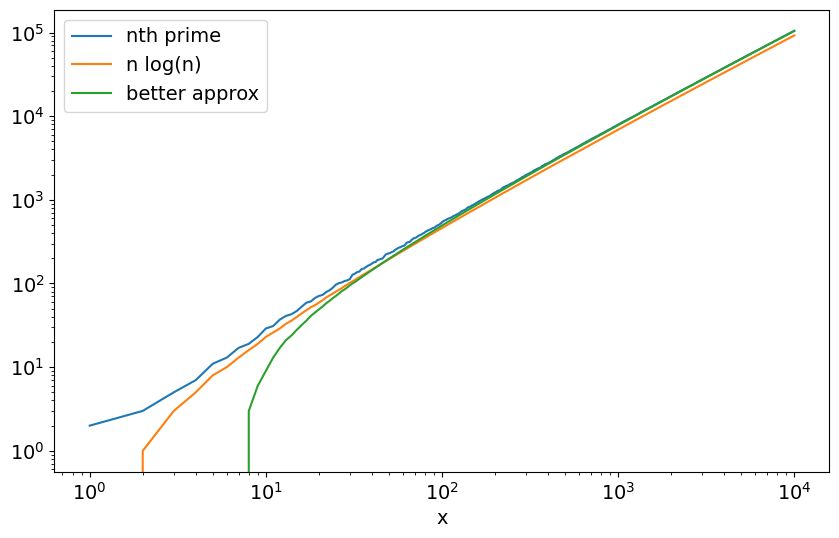

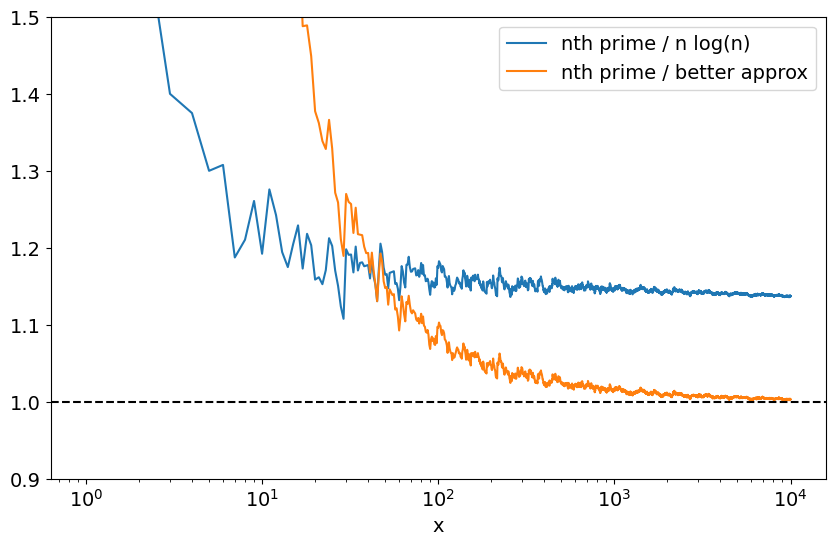

In [12]:
plt.rcParams.update({'font.size': 14})

ns = np.arange(1, max_num+1)
curr_nths = nth_prime_list(max_num)
curr_nths_approx_nlogn = np.array([nth_prime_approx_nlogn(n) for n in ns])
curr_nths_approx_better = np.array([nth_prime_approx_better(n) for n in ns])

plt.figure(figsize=(10, 6))
plt.plot(ns, curr_nths, label="nth prime")
plt.plot(ns, curr_nths_approx_nlogn, label="n log(n)")
plt.plot(ns, curr_nths_approx_better, label="better approx")
plt.legend()
plt.xlabel("x")
plt.xscale("log")
plt.yscale("log")
plt.show()

safer_curr_nths_approx_nlogn = np.where(curr_nths_approx_nlogn == 0, np.nan, curr_nths_approx_nlogn)
safer_curr_nths_approx_better = np.where(curr_nths_approx_better == 0, np.nan, curr_nths_approx_better)

curr_nths_approx_nlogn_ratio = curr_nths / safer_curr_nths_approx_nlogn
curr_nths_approx_better_ratio = curr_nths / safer_curr_nths_approx_better

plt.figure(figsize=(10, 6))
plt.plot(curr_nths_approx_nlogn_ratio, label="nth prime / n log(n)")
plt.plot(curr_nths_approx_better_ratio, label="nth prime / better approx")
plt.axhline(1, color="black", linestyle="--")
plt.legend()
plt.xlabel("x")
#plt.xlim(0, max_num)
plt.xscale("log")
plt.ylim(0.9, 1.5)
plt.show()


In [ ]:
# TODO: investigate prime gaps
# TODO: Scale errors to be more visible at large numbers
# TODO: Make plots for last digit, sum of digits, etc. (simple base-10 primality tests that should be easy to learn)


In [8]:
test_speed = False
test_nth_prime = False

if test_speed:

    def get_prime_list_slow(min, max):
        primes = []
        for num in range(min, max + 1):
            if num > 1:
                for i in range(2, num):
                    if (num % i) == 0:
                        break
                else:
                    primes.append(num)
        return primes

    min, max = 0, int(5e4)
    print(len(get_prime_list(min, max))) # 0.0s
    print(len(get_prime_list_slow(min, max))) # 2.3s

if test_nth_prime:
    
    print("2e17-th prime:")
    print(f"real:          8512677386048191063")
    print("my bad approx:", nth_prime_approx_nlogn(int(2e17)))
    print("my approx:    ", nth_prime_approx_better(int(2e17)))
    print("wiki approx:   8512681315554715386")
